In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from highlight_text import fig_text
from matplotlib.font_manager import FontProperties

[nltk_data] Downloading package punkt to /home/jupyter-
[nltk_data]     betti_jupy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jupyter-
[nltk_data]     betti_jupy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/jupyter-
[nltk_data]     betti_jupy/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
font_path = 'Futura Bold.otf'
futura = FontProperties(fname=font_path)

In [3]:
user2025 = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-04-29/user2025.csv')

In [4]:
user2025.head()

,id,session,date,time,room,title,content,video_recording,keywords,speakers,co_authors
0,170,Virtual,2025-08-01,TBD,Online,A Robust and Informative Application for viewi...,"In R programming, the View() function from the...",✅,"statistical programming, clinical trials data,...",Madhan Kumar Nagaraji,NaN
1,79,Virtual,2025-08-01,TBD,Online,A first look at Positron,Positron is a next generation data science IDE...,✅,"ide, workflow, tooling",Julia Silge (Posit PBC),NaN
2,30,Virtual,2025-08-01,TBD,Online,Analyzing Census Data in R: Techniques and App...,This talk provides an introduction to working ...,✅,"demography, frameworks, census data, equity ml...",Joanne Rodrigues,NaN
3,31,Virtual,2025-08-01,TBD,Online,Automating workflows with webhooks and plumber...,Webhooks have brought to us new possibilities ...,✅,"automation, event-driven workflows, plumber ap...",CLINTON DAVID,NaN
4,39,Virtual,2025-08-01,TBD,Online,Beyond Guesswork: How Econometric Models (MMMs...,In a world where marketing budgets are scrutin...,✅,"marketing, statistical modelling, econometrics...",Abbie Brookes (Data Scientist @ Datacove); Jer...,Abbie Brookes (Data Scientist @ Datacove)


In [5]:
user2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               128 non-null    int64 
 1   session          128 non-null    object
 2   date             128 non-null    object
 3   time             128 non-null    object
 4   room             128 non-null    object
 5   title            128 non-null    object
 6   content          128 non-null    object
 7   video_recording  128 non-null    object
 8   keywords         126 non-null    object
 9   speakers         128 non-null    object
 10  co_authors       39 non-null     object
dtypes: int64(1), object(10)
memory usage: 11.1+ KB


In [6]:
df = user2025.copy()

In [7]:
def clean_text(text):
    if isinstance(text, float):
        text = str(text)  
    
    text = str(text)
    
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    return " ".join(filtered_tokens)

In [8]:
df['cleaned_text'] = df['keywords'].apply(clean_text)

In [9]:
text_for_wordcloud = " ".join(df['cleaned_text'])

In [10]:
image_path = 'logo-greyscale.png'
image = Image.open(image_path)

In [11]:
mask = np.array(image)

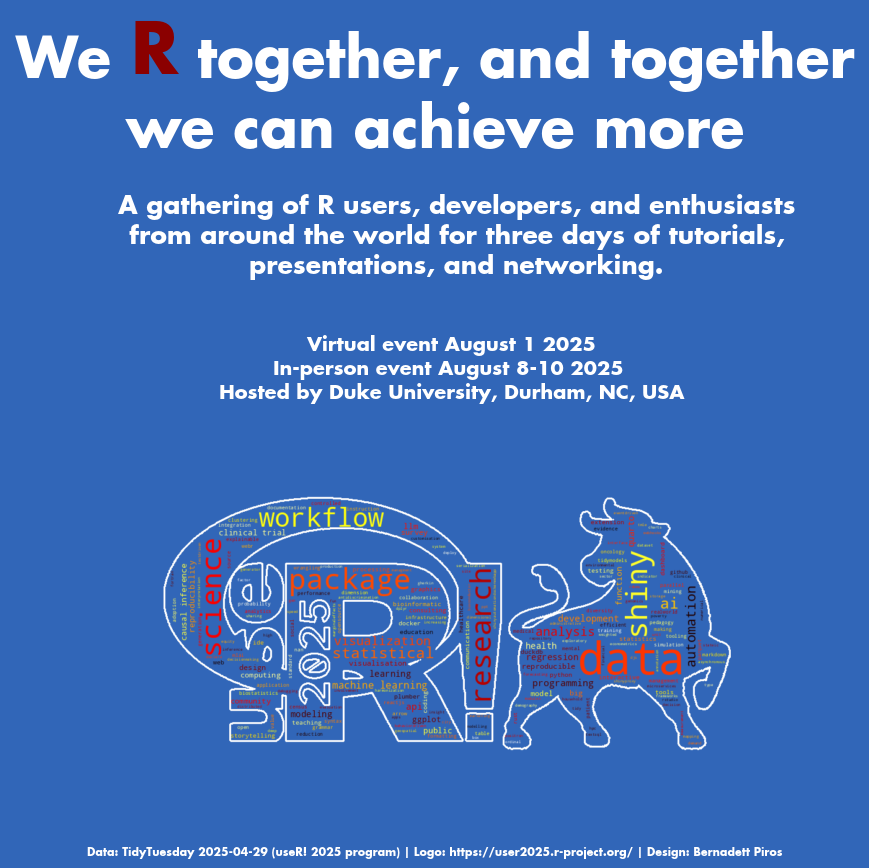

In [19]:
wc = WordCloud(
    background_color='#3166b8',
    mask=mask,
    contour_width=2,
    contour_color='white',
    colormap='hot',    
).generate(text_for_wordcloud)

fig, ax = plt.subplots(figsize=(8, 12))  

ax.imshow(wc, interpolation='bilinear')
ax.axis('off') 

fig_text(0.5, 1, s="We <R> together, and together", color="white", size=40, ha="center", font=futura,
         highlight_textprops=[
             {"size": 50, "color":"darkred",}
             ])

fig.text(0.5, 0.89, s="we can achieve more", color="white", size=40, ha="center", font=futura)

txt2='''
     A gathering of R users, developers, and enthusiasts
     from around the world for three days of tutorials,
     presentations, and networking.
    '''

fig.text(0.5, 0.76, s=txt2, color="white", size=18, ha="center", font=futura)

txt3='''
     Virtual event August 1 2025
     In-person event August 8-10 2025 
     Hosted by Duke University, Durham, NC, USA
     '''

fig.text(0.5, 0.66, s=txt3, color="white", size=14, ha="center", font=futura)


fig.set_facecolor('#3166b8')

fig.text(0.5, 0.3, "Data: TidyTuesday 2025-04-29 (useR! 2025 program) | Logo: https://user2025.r-project.org/ | Design: Bernadett Piros",
         color="white", size=8, font=futura, ha="center")

#plt.show()

fig.savefig("2025-04-29.png", bbox_inches='tight', pad_inches=0.2)